# Análisis y manipulación de datos

Fuente datos:
* **`extinct-languages.csv`:** https://www.kaggle.com/the-guardian/extinct-languages
* **`family.csv`:** https://linguistlist.org/forms/langs/get-extinct.cfm

### Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Datos

### `data.csv`

Contine la información básica del lenguaje:
* Nombre
* País
* Número de hablantes
* Posición geográfica
* Descripción
* Identicados ISO639-3 (Se utiliza para relacionarlo con el otro dataset)

In [2]:
df = pd.read_csv('extinct-languages.csv', encoding='utf-8')
df = df.dropna(subset=['ISO639-3 codes', 'Number of speakers'])
df.head()

,ID,Name in English,Name in French,Name in Spanish,Countries,Country codes alpha 3,ISO639-3 codes,Degree of endangerment,Alternate names,Name in the language,Number of speakers,Sources,Latitude,Longitude,Description of the location
0,1022,South Italian,italien du sud,napolitano-calabrés,Italy,ITA,nap,Vulnerable,Neapolitan; Neapolitan-Calabrese; неаполитанск...,NaN,7500000.0,NaN,40.9798,15.2490,"Campania, Lucania (Basilicata), Abruzzi (Abruz..."
1,1023,Sicilian,sicilien,siciliano,Italy,ITA,scn,Vulnerable,NaN,NaN,5000000.0,NaN,37.4399,14.5019,"Sicily (Sicilia), southern and central Calabri..."
2,383,Low Saxon,bas-saxon,bajo sajón,"Germany, Denmark, Netherlands, Poland, Russian...","DEU, DNK, NLD, POL, RUS","act, drt, frs, gos, nds, sdz, stl, twd, vel, wep",Vulnerable,"Low German, Niedersächsisch, Nedersaksisch, Ni...",Neddersassisch,4800000.0,NaN,53.4029,10.3601,"northern Germany, the north-eastern part of th..."
3,335,Belarusian,biélorusse,bielorruso,"Belarus, Latvia, Lithuania, Poland, Russian Fe...","BRB, LVA, LTU, POL, RUS, UKR",bel,Vulnerable,NaN,NaN,4000000.0,Hienadź Cychun: Weißrussisch. — Lexikon der Sp...,53.9560,27.5756,Belarus except the Polesian-speaking south-wes...
4,382,Lombard,lombard,lombardo,"Italy, Switzerland","ITA, CHE",lmo,Definitely endangered,NaN,NaN,3500000.0,NaN,45.7215,9.3273,the region of Lombardy (except the southernmos...


Distribución de la cantidad de hablantes

### `family.csv`

Contine la información sobre la familia del lenguaje:
* Familia
* Subgrupo

In [3]:
family_df = pd.read_csv('family.csv')
family_df = family_df.replace({'Unclassified': None}).dropna()
family_df.head()

,Language,Code,Subgroup,Family
0,Abipon,axb,Mataco-Guaycuru,Mataco-Guaycuru
2,"Abnaki, Eastern",aaq,Eastern Algonquian,Algic
3,Acroá,acs,Central Ge,Macro-Ge
5,Aequian,xae,Unclassified Italic,Indo-European
6,Aghu Tharnggalu,ggr,Rarmul Pama,Australian


## Procesamiento de los datos

A continuación vamos a juntar los _dataset_ en uno y mantendremos únicamente aquellos lenguaje en los que se pueda identificar su familia y que tengan un número de hablantes definido.
Adicionalmente, solo se mantendrán las columnas necesarias para la visualización.

In [4]:
df_colums = list(df.columns)
for c in ['ID', 'Name in French', 'Name in Spanish', 'Sources', 'Description of the location']:
    df_colums.remove(c)

new_df = pd.DataFrame(columns=[*df_colums, *['Subgroup', 'Family']])
new_df

,Name in English,Countries,Country codes alpha 3,ISO639-3 codes,Degree of endangerment,Alternate names,Name in the language,Number of speakers,Latitude,Longitude,Subgroup,Family


In [5]:
for index, row in df.iterrows():
    codes = row['ISO639-3 codes'].split(', ')
    family = pd.DataFrame(columns=family_df.columns)

    for code in codes:

        data = family_df[family_df['Code'] == code]
        if data.shape[0]:
            family = family.append(data, ignore_index=True)

    family = family[['Subgroup', 'Family']].drop_duplicates()


    data = {}
    for c in df_colums:
        data[c] = row[c]

    if family.shape[0]:
        data['Subgroup'] = family['Subgroup'][0]
        data['Family'] = family['Family'][0]

    new_df = new_df.append(data, ignore_index=True)

In [6]:
new_df

,Name in English,Countries,Country codes alpha 3,ISO639-3 codes,Degree of endangerment,Alternate names,Name in the language,Number of speakers,Latitude,Longitude,Subgroup,Family
0,South Italian,Italy,ITA,nap,Vulnerable,Neapolitan; Neapolitan-Calabrese; неаполитанск...,NaN,7500000.0,40.9798,15.2490,NaN,NaN
1,Sicilian,Italy,ITA,scn,Vulnerable,NaN,NaN,5000000.0,37.4399,14.5019,NaN,NaN
2,Low Saxon,"Germany, Denmark, Netherlands, Poland, Russian...","DEU, DNK, NLD, POL, RUS","act, drt, frs, gos, nds, sdz, stl, twd, vel, wep",Vulnerable,"Low German, Niedersächsisch, Nedersaksisch, Ni...",Neddersassisch,4800000.0,53.4029,10.3601,NaN,NaN
3,Belarusian,"Belarus, Latvia, Lithuania, Poland, Russian Fe...","BRB, LVA, LTU, POL, RUS, UKR",bel,Vulnerable,NaN,NaN,4000000.0,53.9560,27.5756,NaN,NaN
4,Lombard,"Italy, Switzerland","ITA, CHE",lmo,Definitely endangered,NaN,NaN,3500000.0,45.7215,9.3273,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2303,Zeem,Nigeria,NGA,zua,Extinct,"Tule, Danshe",NaN,0.0,9.8389,9.0911,NaN,NaN
2304,|'Auni,South Africa,ZAF,ngh,Extinct,NaN,NaN,0.0,-26.0105,20.3630,NaN,NaN
2305,|Xam,South Africa,ZAF,xam,Extinct,NaN,NaN,0.0,-32.2853,20.7590,!Kwi,Khoisan
2306,ǁKu ǁ'e,South Africa,ZAF,kqu,Extinct,Seroa,NaN,0.0,-29.9739,27.0812,!Kwi,Khoisan


In [7]:
new_df.to_csv('../data.csv', encoding='utf-8', index_label='id')

## Distribución de los datos 

### Cantidad de hablantes

In [8]:
speakers = new_df['Number of speakers']
speakers.describe()

count    2.308000e+03
mean     5.764751e+04
std      3.256819e+05
min      0.000000e+00
25%      6.250000e+01
50%      9.420000e+02
75%      7.000000e+03
max      7.500000e+06
Name: Number of speakers, dtype: float64

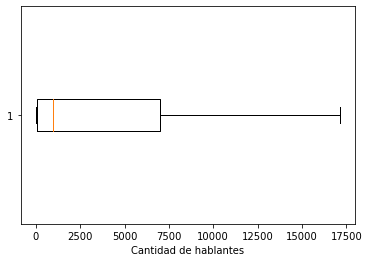

In [9]:
plt.boxplot(speakers, vert=False, showfliers=False)
plt.xlabel('Cantidad de hablantes')

plt.show()

### Diversidad de códigos ISO639-3

In [10]:
list_codes = pd.array([])

for index, row in new_df['ISO639-3 codes'].items():
    list_codes = np.append(list_codes, row.split(', '))

list_codes = pd.Series(list_codes)
code_counts = list_codes.value_counts()
code_counts.describe()

count    2187.000000
mean        1.172382
std         0.587305
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         7.000000
dtype: float64

In [11]:
code_counts[code_counts > 1]

qug    7
adi    7
qxr    7
qvo    7
qvz    7
      ..
tli    2
gir    2
bzg    2
ake    2
pqm    2
Length: 264, dtype: int64

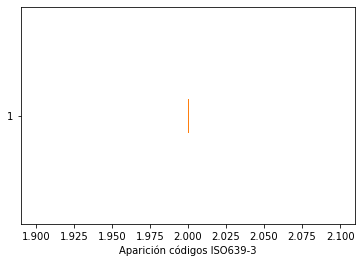

In [12]:
plt.boxplot(code_counts[code_counts > 1], vert=False, showfliers=False)
plt.xlabel('Aparición códigos ISO639-3')

plt.show()

### Diversidad de familias

In [13]:
families = new_df['Family'].value_counts()
families

Austronesian           20
Afroasiatic            11
Niger-Congo             8
Chumash                 6
Nilo-Saharan            6
Khoisan                 5
Arawakan                4
Salishan                4
Hokan                   4
Algic                   3
East Papuan             3
Macro-Ge                3
Australian              3
Indo-European           3
Na-Dene                 3
Trans-New Guinea        3
Yenisei Ostyak          2
Misumalpan              2
Gulf                    2
Penutian                2
Zaparoan                2
Panoan                  2
Language Isolate        2
Choco                   2
Northwest Caucasian     2
Altaic                  2
Tupi                    2
Chapacura-Wanham        1
Eskimo-Aleut            1
Siouan                  1
Tai-Kadai               1
Subtiaba-Tlapanex       1
Tucanoan                1
Sino-Tibetan            1
Uralic                  1
Iroquoian               1
Yukaghir                1
Andamanese              1
Barbacoan   

### Diversidad de subgrupos

In [14]:
subgruops = new_df['Subgroup'].value_counts()
subgruops

Chumash              6
Paiwanic             4
!Kwi                 4
Kazukuru             3
Mattole-Wailaki      2
                    ..
Subtiaba-Tlapanex    1
Northern Dumagat     1
Wiyot                1
Ngangea-So           1
Bieria-Maii          1
Name: Subgroup, Length: 97, dtype: int64

Diversida de subgrupos de la familia Austronesian

In [15]:
subgruops = new_df[new_df['Family'] == 'Austronesian']['Subgroup'].value_counts()
subgruops

Paiwanic                          4
Buru                              2
Oumic                             1
West Manus                        1
Southwest East Formosan           1
Mono-Uruava                       1
Northern East Formosan            1
Melanau                           1
Magoric                           1
Unclassified Austronesian         1
Vanikoro                          1
Unclassified Malayo-Polynesian    1
Bieria-Maii                       1
Busu                              1
Western Admiralty Islands         1
Northern Dumagat                  1
Name: Subgroup, dtype: int64